In [1]:
#Import Dependencies
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as pltp
import numpy as py
import os

In [2]:
#Read Files
data13=pd.read_excel("occupation_data/national_M2013_dl.xls")[['OCC_CODE','OCC_TITLE','OCC_GROUP','TOT_EMP']]
data13['YEAR']='2013'
data13['Suffix']=data13['OCC_CODE'].str[:3]
data14=pd.read_excel("occupation_data/national_M2014_dl.xlsx")[['OCC_CODE','OCC_TITLE','OCC_GROUP','TOT_EMP']]
data14['YEAR']='2014'
data14['Suffix']=data14['OCC_CODE'].str[:3]
data15=pd.read_excel("occupation_data/national_M2015_dl.xlsx")[['OCC_CODE','OCC_TITLE','OCC_GROUP','TOT_EMP']]
data15['YEAR']='2015'
data15['Suffix']=data15['OCC_CODE'].str[:3]
data16=pd.read_excel("occupation_data/national_M2016_dl.xlsx")[['OCC_CODE','OCC_TITLE','OCC_GROUP','TOT_EMP']]
data16['YEAR']='2016'
data16['Suffix']=data16['OCC_CODE'].str[:3]
data17=pd.read_excel("occupation_data/national_M2017_dl.xlsx")[['OCC_CODE','OCC_TITLE','OCC_GROUP','TOT_EMP']]
data17['YEAR']='2017'
data17['Suffix']=data17['OCC_CODE'].str[:3]

In [3]:
#Combine to one data frame
maindf=data13.append(data14).append(data15).append(data16).append(data17)
maindf.head()

,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,YEAR,Suffix
0,00-0000,All Occupations,total,132588810,2013,00-
1,11-0000,Management Occupations,major,6542950,2013,11-
2,11-1000,Top Executives,minor,2278260,2013,11-
3,11-1010,Chief Executives,broad,248760,2013,11-
4,11-1011,Chief Executives,detailed,248760,2013,11-


In [4]:
#Loc to get data on Financial realted minor OCC_GROUP data
financial=maindf.loc[(maindf['Suffix']=="13-") & (maindf['OCC_GROUP']=="detailed"),:].reset_index(drop=True)
financial.head()

,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,YEAR,Suffix
0,13-1011,"Agents and Business Managers of Artists, Perfo...",detailed,11680,2013,13-
1,13-1021,"Buyers and Purchasing Agents, Farm Products",detailed,11290,2013,13-
2,13-1022,"Wholesale and Retail Buyers, Except Farm Products",detailed,112290,2013,13-
3,13-1023,"Purchasing Agents, Except Wholesale, Retail, a...",detailed,284480,2013,13-
4,13-1031,"Claims Adjusters, Examiners, and Investigators",detailed,275500,2013,13-


In [5]:
#Manipulate to get better view of  year change
financial=financial[['OCC_TITLE','TOT_EMP','YEAR']]
pivot_financial = financial.pivot(index='OCC_TITLE', columns='YEAR', values='TOT_EMP').dropna().reset_index(drop=False)
pivot_financial['Increase Amount']=pivot_financial['2017']-pivot_financial['2013']
pivot_financial.sort_values('Increase Amount',ascending=False).reset_index(drop=True)

YEAR,OCC_TITLE,2013,2014,2015,2016,2017,Increase Amount
0,Market Research Analysts and Marketing Special...,430350.0,468160.0,506420.0,558630.0,596450.0,166100.0
1,Human Resources Specialists,426570.0,456170.0,491090.0,524800.0,553950.0,127380.0
2,Management Analysts,567840.0,587450.0,614110.0,637690.0,659200.0,91360.0
3,Accountants and Auditors,1168330.0,1187310.0,1226910.0,1246540.0,1241000.0,72670.0
4,"Business Operations Specialists, All Other",938480.0,934370.0,926610.0,958670.0,1001420.0,62940.0
5,Training and Development Specialists,224110.0,239500.0,254060.0,269710.0,280340.0,56230.0
6,Compliance Officers,236090.0,246970.0,257010.0,273910.0,287130.0,51040.0
7,Financial Analysts,250670.0,262610.0,268360.0,281610.0,294110.0,43440.0
8,Logisticians,120340.0,125670.0,133770.0,146060.0,159800.0,39460.0
9,"Meeting, Convention, and Event Planners",73290.0,77940.0,87400.0,95850.0,102420.0,29130.0


In [6]:
#loc data from maindf to extract only all detailed jobs
detailed=maindf.loc[maindf['OCC_GROUP']=="detailed",:]
detailed.head(3)

,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,YEAR,Suffix
4,11-1011,Chief Executives,detailed,248760,2013,11-
6,11-1021,General and Operations Managers,detailed,1973700,2013,11-
8,11-1031,Legislators,detailed,55800,2013,11-


In [7]:
#list of top 5 total employment amount jobs
detailed[['OCC_TITLE','TOT_EMP']].groupby("OCC_TITLE").sum().sort_values('TOT_EMP',ascending=False).head()

,TOT_EMP
OCC_TITLE,
Retail Salespersons,22630490
Cashiers,17326150
"Combined Food Preparation and Serving Workers, Including Fast Food",16373040
"Office Clerks, General",14589570
Registered Nurses,13859130


In [8]:
#list of 10 top changings 
change=pd.merge(data13,data17,how="inner",on="OCC_CODE",suffixes=('_13', '_17'))
change['Employment Increase Amount']=change['TOT_EMP_17']-change['TOT_EMP_13']
change.head()

,OCC_CODE,OCC_TITLE_13,OCC_GROUP_13,TOT_EMP_13,YEAR_13,Suffix_13,OCC_TITLE_17,OCC_GROUP_17,TOT_EMP_17,YEAR_17,Suffix_17,Employment Increase Amount
0,00-0000,All Occupations,total,132588810,2013,00-,All Occupations,total,142549250,2017,00-,9960440
1,11-0000,Management Occupations,major,6542950,2013,11-,Management Occupations,major,7280330,2017,11-,737380
2,11-1000,Top Executives,minor,2278260,2013,11-,Top Executives,minor,2473740,2017,11-,195480
3,11-1010,Chief Executives,broad,248760,2013,11-,Chief Executives,broad,210160,2017,11-,-38600
4,11-1011,Chief Executives,detailed,248760,2013,11-,Chief Executives,detailed,210160,2017,11-,-38600


In [9]:
#Loc on changes for detailed jobs
subchange=change.loc[change['OCC_GROUP_13']=='detailed',:]
subchange=subchange[['OCC_CODE','OCC_TITLE_13','Employment Increase Amount','Suffix_13']].sort_values('Employment Increase Amount',ascending=False).reset_index(drop=True)
subchange.head()

,OCC_CODE,OCC_TITLE_13,Employment Increase Amount,Suffix_13
0,39-9021,Personal Care Aides,900140,39-
1,35-3021,"Combined Food Preparation and Serving Workers,...",553340,35-
2,53-7062,"Laborers and Freight, Stock, and Material Move...",426670,53-
3,43-4051,Customer Service Representatives,378210,43-
4,43-5081,Stock Clerks and Order Fillers,245630,43-


In [10]:
#Jobs on the rise
top10list = subchange.loc[:9,"OCC_TITLE_13"]
top10list

0                                  Personal Care Aides
1    Combined Food Preparation and Serving Workers,...
2    Laborers and Freight, Stock, and Material Move...
3                     Customer Service Representatives
4                       Stock Clerks and Order Fillers
5                                    Registered Nurses
6           Sales Representatives, Services, All Other
7                      General and Operations Managers
8                                             Cashiers
9                                    Cooks, Restaurant
Name: OCC_TITLE_13, dtype: object

In [11]:
#Jobs in decline
topworst=subchange[['OCC_CODE','OCC_TITLE_13','Employment Increase Amount','Suffix_13']].sort_values('Employment Increase Amount').reset_index(drop=True)
worst10list = topworst.loc[:9,"OCC_TITLE_13"]
worst10list

0    Executive Secretaries and Executive Administra...
1                          Bill and Account Collectors
2                                 Computer Programmers
3         Bookkeeping, Accounting, and Auditing Clerks
4                                  Retail Salespersons
5                                        Telemarketers
6                                     Chief Executives
7    Switchboard Operators, Including Answering Ser...
8                                              Tellers
9                                    Childcare Workers
Name: OCC_TITLE_13, dtype: object

In [12]:
#Group by major
major=maindf.loc[maindf['OCC_GROUP']=="major",:]
major.head()

,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,YEAR,Suffix
1,11-0000,Management Occupations,major,6542950,2013,11-
70,13-0000,Business and Financial Operations Occupations,major,6658090,2013,13-
128,15-0000,Computer and Mathematical Occupations,major,3696180,2013,15-
161,17-0000,Architecture and Engineering Occupations,major,2380840,2013,17-
221,19-0000,"Life, Physical, and Social Science Occupations",major,1135030,2013,19-


In [13]:
# pivot_major=major[['OCC_TITLE','TOT_EMP','YEAR']]
# pivot_major.pivot(index='OCC_TITLE', columns='YEAR', values='TOT_EMP')
# major.groupby("OCC_TITLE")

In [14]:
#Loc to gather all employment totals by year
totals = maindf.loc[(maindf['OCC_TITLE']=='All Occupations'),:]

In [15]:
totals

,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,YEAR,Suffix
0,00-0000,All Occupations,total,132588810,2013,00-
0,00-0000,All Occupations,total,135128260,2014,00-
0,00-0000,All Occupations,total,137896660,2015,00-
0,00-0000,All Occupations,total,140400040,2016,00-
0,00-0000,All Occupations,total,142549250,2017,00-


In [16]:
#Loc to identify sufix for top major job groups
top10lis_major = subchange.loc[:9,"Suffix_13"]
top10lis_major

0    39-
1    35-
2    53-
3    43-
4    43-
5    29-
6    41-
7    11-
8    41-
9    35-
Name: Suffix_13, dtype: object

In [17]:
# Major Pie 2013 Top
major_2013 = major.loc[(major['YEAR']=='2013') & (major['Suffix'].isin(['39-','35-','53-','43-','29-','42-','11-'])),:]
full_major_2013=major_2013
all_others_2013 = 132588810 - major_2013['TOT_EMP'].sum()

others2013 = pd.DataFrame([["xx-xxxx",'All Others','total',71940800, 2013,'xx-']],
                         columns=['OCC_CODE','OCC_TITLE','OCC_GROUP','TOT_EMP','YEAR','Suffix'])

full_major_2013 = full_major_2013.append(others2013, ignore_index=True)

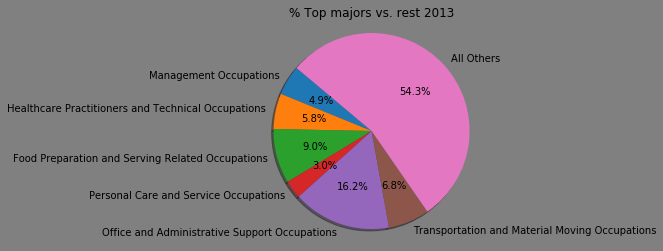

In [18]:
labels = full_major_2013['OCC_TITLE']
sizes = full_major_2013['TOT_EMP']
pltp.pie(sizes, labels=labels,autopct="%1.1f%%",shadow=True, startangle=140)
pltp.title("% Top majors vs. rest 2013")
pltp.axis("equal")
fig = pltp.gcf()
fig.set_facecolor('grey')
pltp.savefig("top_major_pie_2013.png")
pltp.show()

In [19]:
# Major Pie 2017 Top
major_2017 = major.loc[(major['YEAR']=='2017') & (major['Suffix'].isin(['39-','35-','53-','43-','29-','42-','11-'])),:]
full_major_2017 = major_2017
all_others_2017 = 142549250 - major_2017['TOT_EMP'].sum()
all_others_2017

76466120

In [20]:
others2017= pd.DataFrame([["xx-xxxx",'All Others','total',76466120, 2017,'xx-']],
                         columns=['OCC_CODE','OCC_TITLE','OCC_GROUP','TOT_EMP','YEAR','Suffix'])
full_major_2017 = full_major_2017.append(others2017, ignore_index=True)

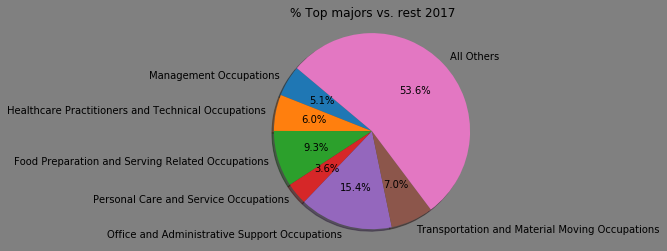

In [21]:
labels = full_major_2017['OCC_TITLE']
sizes = full_major_2017['TOT_EMP']
pltp.pie(sizes, labels=labels,autopct="%1.1f%%",shadow=True, startangle=140)
pltp.title("% Top majors vs. rest 2017")
pltp.axis("equal")
fig = pltp.gcf()
fig.set_facecolor('grey')
pltp.savefig("top_major_pie_2017.png")
pltp.show()

In [22]:
#Loc to identify sufix for top major job groups
worst10list_major = topworst.loc[:9,"Suffix_13"]
worst10list_major

0    43-
1    43-
2    15-
3    43-
4    41-
5    41-
6    11-
7    43-
8    43-
9    39-
Name: Suffix_13, dtype: object

In [23]:
# Major Pie 2013 Worst
w_major_2013 = major.loc[(major['YEAR']=='2013') & (major['Suffix'].isin(['39-','43-','11-','41-','15-'])),:]
w_full_major_2013 = w_major_2013
w_all_others_2013 = 132588810 - w_major_2013['TOT_EMP'].sum()
w_all_others_2013

82851950

In [24]:
w_others2013= pd.DataFrame([["xx-xxxx",'All Others','total',89360300, 2013,'xx-']],
                         columns=['OCC_CODE','OCC_TITLE','OCC_GROUP','TOT_EMP','YEAR','Suffix'])
w_full_major_2013 = w_full_major_2013.append(w_others2013, ignore_index=True)


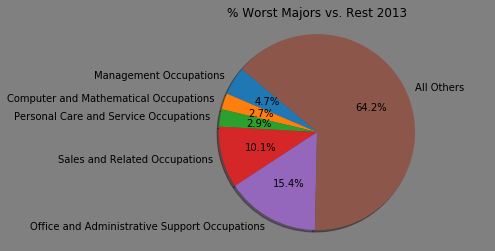

In [25]:
labels = w_full_major_2013['OCC_TITLE']
sizes = w_full_major_2013['TOT_EMP']
pltp.pie(sizes, labels=labels,autopct="%1.1f%%",shadow=True, startangle=140,)
pltp.title("% Worst Majors vs. Rest 2013")
pltp.axis("equal")
fig = pltp.gcf()
fig.set_facecolor('grey')
pltp.savefig("worst_major_pie_2013.png")
pltp.show()

In [26]:
# Major Pie 2017 Worst
w_major_2017 = major.loc[(major['YEAR']=='2017') & (major['Suffix'].isin(['39-','43-','11-','41-','15-'])),:]
w_full_major_2017 = w_major_2017
w_all_others_2017 = 142549250 - w_major_2017['TOT_EMP'].sum()
w_all_others_2017

89360300

In [27]:
w_others2017= pd.DataFrame([["xx-xxxx",'All Others','total',89360300, 2017,'xx-']],
                         columns=['OCC_CODE','OCC_TITLE','OCC_GROUP','TOT_EMP','YEAR','Suffix'])
w_full_major_2017 = w_full_major_2017.append(w_others2017, ignore_index=True)


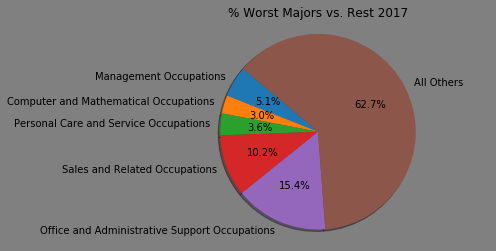

In [28]:
labels = w_full_major_2017['OCC_TITLE']
sizes = w_full_major_2017['TOT_EMP']
pltp.pie(sizes, labels=labels,autopct="%1.1f%%",shadow=True, startangle=140)
pltp.title("% Worst Majors vs. Rest 2017")
pltp.axis("equal")
fig = pltp.gcf()
fig.set_facecolor('gray')
pltp.savefig("worst_major_pie_2017.png")
pltp.show()

In [29]:
# Best detail pie 2013
b_detailed_2013 = detailed.loc[(detailed['YEAR']=='2013') & (detailed['OCC_TITLE'].isin(['Personal Care Aides','Combined Food Preparation and Serving Workers, Including Fast Food''Laborers and Freight','Stock, and Material Movers, Hand','Customer Service Representatives','Stock Clerks and Order Fillers','Registered Nurses','Sales Representatives, Services, All Other','General and Operations Managers','Cashiers','Cooks, Restaurant'])),:]

b_full_detailed_2013 = b_detailed_2013
b_all_odetailed_2013 = 132588810 - b_detailed_2013['TOT_EMP'].sum()
b_all_odetailed_2013

117465760

In [30]:
b_odetailed2013= pd.DataFrame([["xx-xxxx",'All Others','total',124942930, 2013,'xx-']],
                         columns=['OCC_CODE','OCC_TITLE','OCC_GROUP','TOT_EMP','YEAR','Suffix'])
b_full_detailed_2013 = b_full_detailed_2013.append(b_odetailed2013, ignore_index=True)
b_full_detailed_2013

,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,YEAR,Suffix
0,11-1021,General and Operations Managers,detailed,1973700,2013,11-
1,29-1141,Registered Nurses,detailed,2661890,2013,29-
2,35-2014,"Cooks, Restaurant",detailed,1057550,2013,35-
3,39-9021,Personal Care Aides,detailed,1135470,2013,39-
4,41-2011,Cashiers,detailed,3343470,2013,41-
5,41-3099,"Sales Representatives, Services, All Other",detailed,760980,2013,41-
6,43-4051,Customer Service Representatives,detailed,2389580,2013,43-
7,43-5081,Stock Clerks and Order Fillers,detailed,1800410,2013,43-
8,xx-xxxx,All Others,total,124942930,2013,xx-


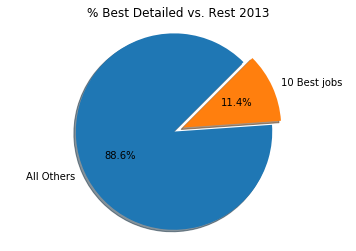

In [31]:
labels = ['All Others', '10 Best jobs']
sizes = [b_all_odetailed_2013, b_detailed_2013['TOT_EMP'].sum()]
explode=(0,0.1)
pltp.pie(sizes, labels=labels,autopct="%1.1f%%",shadow=True, startangle=45,explode=explode)
pltp.title("% Best Detailed vs. Rest 2013")
pltp.axis("equal")
pltp.savefig("best_detailed_pie_2013.png")
pltp.show()

In [32]:
# Best detail pie 2017
b_detailed_2017 = detailed.loc[(detailed['YEAR']=='2017') & (detailed['OCC_TITLE'].isin(['Personal Care Aides','Combined Food Preparation and Serving Workers, Including Fast Food','Laborers and Freight, Stock, and Material Movers, Hand','Customer Service Representatives','Stock Clerks and Order Fillers','Registered Nurses','Sales Representatives, Services, All Other','General and Operations Managers','Cashiers','Cooks, Restaurant'])),:]

b_full_detailed_2017 = b_detailed_2017
b_all_odetailed_2017 = 132588810 - b_detailed_2017['TOT_EMP'].sum()
b_all_odetailed_2017

108487340

In [33]:
b_odetailed2017= pd.DataFrame([["xx-xxxx",'All Others','total',114774880, 2017,'xx-']],
                         columns=['OCC_CODE','OCC_TITLE','OCC_GROUP','TOT_EMP','YEAR','Suffix'])
b_full_detailed_2017 = b_full_detailed_2017.append(b_odetailed2017, ignore_index=True)
b_full_detailed_2017

,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,YEAR,Suffix
0,11-1021,General and Operations Managers,detailed,2212200,2017,11-
1,29-1141,Registered Nurses,detailed,2906840,2017,29-
2,35-2014,"Cooks, Restaurant",detailed,1276510,2017,35-
3,35-3021,"Combined Food Preparation and Serving Workers,...",detailed,3576220,2017,35-
4,39-9021,Personal Care Aides,detailed,2035610,2017,39-
5,41-2011,Cashiers,detailed,3564920,2017,41-
6,41-3099,"Sales Representatives, Services, All Other",detailed,1004020,2017,41-
7,43-4051,Customer Service Representatives,detailed,2767790,2017,43-
8,43-5081,Stock Clerks and Order Fillers,detailed,2046040,2017,43-
9,53-7062,"Laborers and Freight, Stock, and Material Move...",detailed,2711320,2017,53-


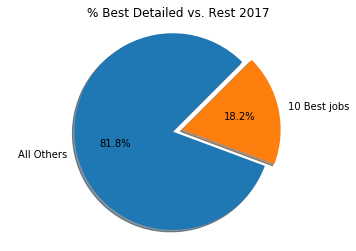

In [34]:
labels = ['All Others', '10 Best jobs']
sizes = [b_all_odetailed_2017, b_detailed_2017['TOT_EMP'].sum()]
explode=(0,0.1)
pltp.pie(sizes, labels=labels,autopct="%1.1f%%",shadow=True, startangle=45,explode=explode)
pltp.title("% Best Detailed vs. Rest 2017")
pltp.axis("equal")
pltp.savefig("best_detailed_pie_2017.png")
pltp.show()

In [35]:
detailed.head()
worst10list

0    Executive Secretaries and Executive Administra...
1                          Bill and Account Collectors
2                                 Computer Programmers
3         Bookkeeping, Accounting, and Auditing Clerks
4                                  Retail Salespersons
5                                        Telemarketers
6                                     Chief Executives
7    Switchboard Operators, Including Answering Ser...
8                                              Tellers
9                                    Childcare Workers
Name: OCC_TITLE_13, dtype: object

In [36]:
# Worst detail pie 2013
w_detailed_2013 = detailed.loc[(detailed['YEAR']=='2013') & (detailed['OCC_TITLE'].isin(['Executive Secretaries and Executive Administrative Assistants','Bill and Account Collectors','Computer Programmers','Retail Salespersons','Telemarketers','Chief Executives','Switchboard Operators, Including Answering Service','Tellers','Childcare Workers','Bookkeeping, Accounting, and Auditing Clerks'])),:]
w_full_detailed_2013 = w_detailed_2013
w_all_odetailed_2013 = 132588810 - w_detailed_2013['TOT_EMP'].sum()
w_all_odetailed_2013


123356550

In [37]:
w_odetailed2013= pd.DataFrame([["xx-xxxx",'All Others','total',123356550, 2013,'xx-']],
                         columns=['OCC_CODE','OCC_TITLE','OCC_GROUP','TOT_EMP','YEAR','Suffix'])
w_full_detailed_2013 = w_full_detailed_2013.append(w_odetailed2013, ignore_index=True)
w_full_detailed_2013

,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,YEAR,Suffix
0,11-1011,Chief Executives,detailed,248760,2013,11-
1,15-1131,Computer Programmers,detailed,312340,2013,15-
2,39-9011,Childcare Workers,detailed,597900,2013,39-
3,41-2031,Retail Salespersons,detailed,4485180,2013,41-
4,41-9041,Telemarketers,detailed,231900,2013,41-
5,43-2011,"Switchboard Operators, Including Answering Ser...",detailed,118060,2013,43-
6,43-3011,Bill and Account Collectors,detailed,368850,2013,43-
7,43-3031,"Bookkeeping, Accounting, and Auditing Clerks",detailed,1586380,2013,43-
8,43-3071,Tellers,detailed,527680,2013,43-
9,43-6011,Executive Secretaries and Executive Administra...,detailed,755210,2013,43-


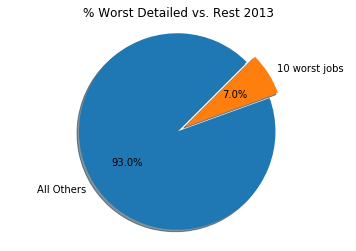

In [38]:
labels = ['All Others', '10 worst jobs']
sizes = [w_all_odetailed_2013, w_detailed_2013['TOT_EMP'].sum()]
explode=(0,0.1)
pltp.pie(sizes, labels=labels,autopct="%1.1f%%",shadow=True, startangle=45,explode=explode)
pltp.title("% Worst Detailed vs. Rest 2013")
pltp.axis("equal")
pltp.savefig("worst_detailed_pie_2013.png")
pltp.show()

In [39]:
# Worst detail pie 2017
w_detailed_2017 = detailed.loc[(detailed['YEAR']=='2017') & (detailed['OCC_TITLE'].isin(['Executive Secretaries and Executive Administrative Assistants','Bill and Account Collectors','Computer Programmers','Retail Salespersons','Telemarketers','Chief Executives','Switchboard Operators, Including Answering Service','Tellers','Childcare Workers','Bookkeeping, Accounting, and Auditing Clerks'])),:]
w_full_detailed_2017 = w_detailed_2017
w_all_odetailed_2017 = 142549250 - w_detailed_2017['TOT_EMP'].sum()
w_all_odetailed_2017

133925570

In [40]:
w_odetailed2017= pd.DataFrame([["xx-xxxx",'All Others','total',133925570, 2017,'xx-']],
                         columns=['OCC_CODE','OCC_TITLE','OCC_GROUP','TOT_EMP','YEAR','Suffix'])
w_full_detailed_2017 = w_full_detailed_2017.append(w_odetailed2017, ignore_index=True)
w_full_detailed_2017

,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,YEAR,Suffix
0,11-1011,Chief Executives,detailed,210160,2017,11-
1,15-1131,Computer Programmers,detailed,247690,2017,15-
2,39-9011,Childcare Workers,detailed,562420,2017,39-
3,41-2031,Retail Salespersons,detailed,4442090,2017,41-
4,41-9041,Telemarketers,detailed,189670,2017,41-
5,43-2011,"Switchboard Operators, Including Answering Ser...",detailed,80380,2017,43-
6,43-3011,Bill and Account Collectors,detailed,271700,2017,43-
7,43-3031,"Bookkeeping, Accounting, and Auditing Clerks",detailed,1532340,2017,43-
8,43-3071,Tellers,detailed,491150,2017,43-
9,43-6011,Executive Secretaries and Executive Administra...,detailed,596080,2017,43-


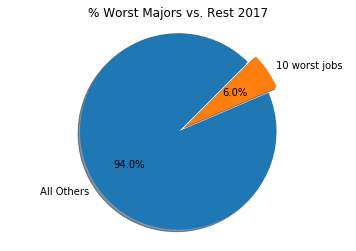

In [41]:
labels = ['All Others', '10 worst jobs']
sizes = [w_all_odetailed_2017, w_detailed_2017['TOT_EMP'].sum()]
explode=(0,0.1)
pltp.pie(sizes, labels=labels,autopct="%1.1f%%",shadow=True, startangle=45,explode=explode)
pltp.title("% Worst Majors vs. Rest 2017")
pltp.axis("equal") 
pltp.savefig("worst_detailed_pie_2017.png")
pltp.show()

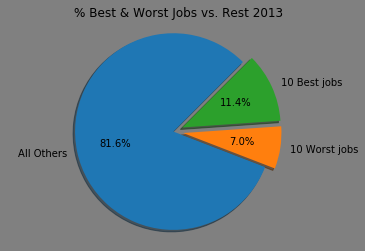

In [42]:
# combined best & worst vs. rest Pie 2013
c_all_odetailed_2013 = 132588810 - (w_detailed_2013['TOT_EMP'].sum() + b_detailed_2013['TOT_EMP'].sum())
labels = ['All Others','10 Worst jobs', '10 Best jobs']
sizes = [c_all_odetailed_2013, w_detailed_2013['TOT_EMP'].sum(),b_detailed_2013['TOT_EMP'].sum()]
explode=(0,0.1,0.1)
pltp.pie(sizes, labels=labels,autopct="%1.1f%%",shadow=True, startangle=45,explode=explode)
pltp.title("% Best & Worst Jobs vs. Rest 2013")
pltp.axis("equal")
fig = pltp.gcf()
fig.set_facecolor('grey')
pltp.savefig("combined_detailed_pie_2013.png")
pltp.show()

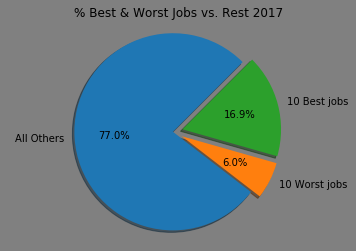

In [43]:
# combined best & worst vs. rest Pie 2017
c_all_odetailed_2017 = 142549250 - (w_detailed_2017['TOT_EMP'].sum() + b_detailed_2017['TOT_EMP'].sum())
labels = ['All Others','10 Worst jobs', '10 Best jobs']
sizes = [c_all_odetailed_2017, w_detailed_2017['TOT_EMP'].sum(),b_detailed_2017['TOT_EMP'].sum()]
explode=(0,0.1,0.1)
bg_color = 'black'
pltp.pie(sizes, labels=labels,autopct="%1.1f%%",shadow=True, startangle=45,explode=explode)
pltp.title("% Best & Worst Jobs vs. Rest 2017")
pltp.axis("equal")
fig = pltp.gcf()
fig.set_facecolor('grey')
pltp.savefig("combined_detailed_pie_2017.png")
pltp.show()

In [44]:
# Line Graphs

In [45]:
top_and_worst_df = maindf.loc[(maindf['OCC_GROUP']=='detailed') & (maindf['OCC_TITLE'].isin(['Executive Secretaries and Executive Administrative Assistants',
                                                                                             'Bill and Account Collectors',
                                                                                             'Computer Programmers',
                                                                                             'Bookkeeping, Accounting, and Auditing Clerks',
                                                                                             'Retail Salespersons',
                                                                                             'Telemarketers',
                                                                                             'Chief Executives',
                                                                                             'Switchboard Operators, Including Answering Service',
                                                                                             'Tellers',
                                                                                             'Childcare Workers',
                                                                                             'Personal Care Aides',
                                                                                             'Combined Food Preparation and Serving Workers, Including Fast Food',
                                                                                             'Laborers and Freight, Stock, and Material Movers, Hand',
                                                                                             'Customer Service Representatives',
                                                                                             'Stock Clerks and Order Fillers',
                                                                                             'Registered Nurses',
                                                                                             'Sales Representatives, Services, All Other',
                                                                                             'General and Operations Managers',
                                                                                             'Cashiers',
                                                                                             'Cooks, Restaurant'])),:]


In [46]:
#loc to capture Y values for line graph
top_and_worst_df.head()
d1 = top_and_worst_df.loc[(top_and_worst_df['OCC_TITLE']=='Executive Secretaries and Executive Administrative Assistants'),:]
d2 = top_and_worst_df.loc[(top_and_worst_df['OCC_TITLE']=='Bill and Account Collectors'),:]
d3 = top_and_worst_df.loc[(top_and_worst_df['OCC_TITLE']=='Computer Programmers'),:]
d4 = top_and_worst_df.loc[(top_and_worst_df['OCC_TITLE']=='Bookkeeping, Accounting, and Auditing Clerks'),:]
d5 = top_and_worst_df.loc[(top_and_worst_df['OCC_TITLE']=='Retail Salespersons'),:]
d6 = top_and_worst_df.loc[(top_and_worst_df['OCC_TITLE']=='Personal Care Aides'),:]
d7 = top_and_worst_df.loc[(top_and_worst_df['OCC_TITLE']=='Combined Food Preparation and Serving Workers, Including Fast Food'),:]
d8 = top_and_worst_df.loc[(top_and_worst_df['OCC_TITLE']=='Laborers and Freight, Stock, and Material Movers, Hand'),:]
d9 = top_and_worst_df.loc[(top_and_worst_df['OCC_TITLE']=='Customer Service Representatives'),:]
d10 = top_and_worst_df.loc[(top_and_worst_df['OCC_TITLE']=='Stock Clerks and Order Fillers'),:]
top_and_worst_df.head()

,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,YEAR,Suffix
4,11-1011,Chief Executives,detailed,248760,2013,11-
6,11-1021,General and Operations Managers,detailed,1973700,2013,11-
136,15-1131,Computer Programmers,detailed,312340,2013,15-
534,29-1141,Registered Nurses,detailed,2661890,2013,29-
662,35-2014,"Cooks, Restaurant",detailed,1057550,2013,35-


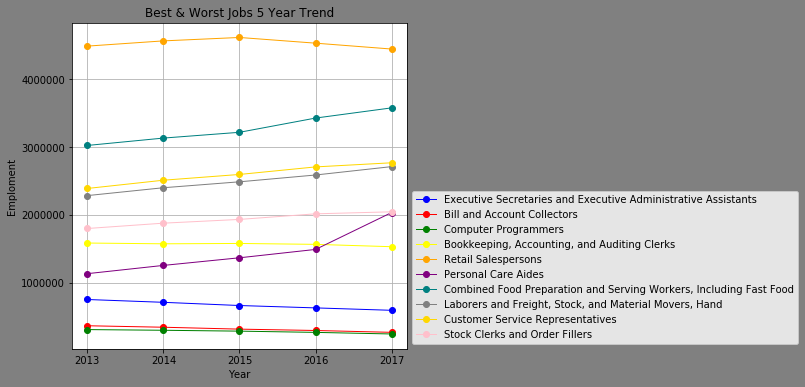

In [47]:
x = ["2013","2014","2015","2016","2017"]
y1=d1['TOT_EMP']
y2=d2['TOT_EMP']
y3=d3['TOT_EMP']
y4=d4['TOT_EMP']
y5=d5['TOT_EMP']
y6=d6['TOT_EMP']
y7=d7['TOT_EMP']
y8=d8['TOT_EMP']
y9=d9['TOT_EMP']
y10=d10['TOT_EMP']

totals_hnd1, = pltp.plot(x, y1, marker="o",color="blue", linewidth=1, label='Executive Secretaries and Executive Administrative Assistants')
totals_hnd2, = pltp.plot(x, y2, marker="o",color="red", linewidth=1, label='Bill and Account Collectors')
totals_hnd3, = pltp.plot(x, y3, marker="o",color="green", linewidth=1, label='Computer Programmers')
totals_hnd4, = pltp.plot(x, y4, marker="o",color="yellow", linewidth=1, label='Bookkeeping, Accounting, and Auditing Clerks')
totals_hnd5, = pltp.plot(x, y5, marker="o",color="orange", linewidth=1, label='Retail Salespersons')
totals_hnd6, = pltp.plot(x, y6, marker="o",color="purple", linewidth=1, label='Personal Care Aides')
totals_hnd7, = pltp.plot(x, y7, marker="o",color="teal", linewidth=1, label='Combined Food Preparation and Serving Workers, Including Fast Food')
totals_hnd8, = pltp.plot(x, y8, marker="o",color="grey", linewidth=1, label='Laborers and Freight, Stock, and Material Movers, Hand')
totals_hnd9, = pltp.plot(x, y9, marker="o",color="gold", linewidth=1, label='Customer Service Representatives')
totals_hnd10, = pltp.plot(x, y10, marker="o",color="pink", linewidth=1, label='Stock Clerks and Order Fillers',)
pltp.legend(loc='best', bbox_to_anchor=(1, 0.5))
fig = pltp.gcf()
fig.set_facecolor('grey')
fig.set_size_inches(6,6)
pltp.grid()
pltp.xlabel('Year')
pltp.ylabel('Emploment')
pltp.title("Best & Worst Jobs 5 Year Trend")
pltp.savefig("top5_and_worst5_line.png")
pltp.show()